<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/22_Keras_Using_CNN's_as_Feature_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.applications import VGG16, imagenet_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tqdm
import os

In [ ]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:04<00:00, 195MB/s]


In [ ]:
filenames = os.listdir('./train')

categories = []

for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename': filename,
    'class': categories
})

df.head()

,filename,class
0,cat.8492.jpg,0
1,cat.8492.jpg,0
2,cat.8492.jpg,1
3,cat.8492.jpg,0
4,cat.8492.jpg,0


In [ ]:
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
image_names = os.listdir('./train')
image_paths = ['./train/' + x for x in image_names]
labels = list(df['class'])

**Extract Features using VGG16**

In [ ]:
batch_size = 32
image_features = []
image_labels = []

for i in range(0, len(image_paths)//batch_size):
  batch_paths = image_paths[i:i + batch_size]
  batch_labels = labels[i:i + batch_size]
  batch_images = []

  for image_path in batch_paths:
    image = load_img(image_path, target_size=(224,224))
    image = img_to_array(image)

    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)

    batch_images.append(image)

  batch_images = np.vstack(batch_images)

  features = model.predict(batch_images, batch_size = batch_size)

  features = np.reshape(features, (-1, 7*7*512))

  image_features.append(features)
  image_labels.append(batch_labels)

1/1 [==============================] - 0s 28ms/step


In [ ]:
# Lets take a look at the image features
print(image_features[0].shape)
image_features[0]

(32, 25088)


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 2.600384 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 2.4162517,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        8.182706 ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [ ]:
image_labels

[[0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1],
 [0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1],
 [1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1],
 [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1],
 [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0],
 [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1],
 [0,
  1,
  0,
  0,
  0,
  0,
  0,

**Training a Logistic Regression classifier on the filters**

In [ ]:
imageLabels_data = [lb for label_batch in image_labels for lb in label_batch]
imageFeatures_data = [feature for feature_batch in image_features for feature in feature_batch]

image_labels_data = np.array(imageLabels_data)
image_features_data = np.array(imageFeatures_data)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = image_labels_data

X_train, X_test, y_train, y_test = train_test_split(image_features_data, y, test_size=0.2, random_state=7)

glm = LogisticRegression(C=0.1)
glm.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
accuracy = glm.score(X_test, y_test)
print(f'Accuracy on the validation set using Logistic Regression is {accuracy*100}%')

Accuracy on the validation set using Logistic Regression is 100.0%


**Test some inferences**

In [ ]:
image_names_test = os.listdir('./test1')
image_path_test = ['./test1/' + x for x in image_names_test]

In [ ]:
import random

test_sample = random.sample(image_path_test, 12)

def test_img():
  result_lst = []
  for path in test_sample:
    image = load_img(path, target_size=(224,224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)
    features = model.predict(image)
    features = np.reshape(features, (-1,7*7*512))
    result = glm.predict(features)
    result = 'dog' if float(result)>0.5 else 'cat'
    result_lst.append(result)

  return result_lst

In [ ]:
pred_results = test_img()
pred_results

1/1 [==============================] - 0s 47ms/step


['dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog']

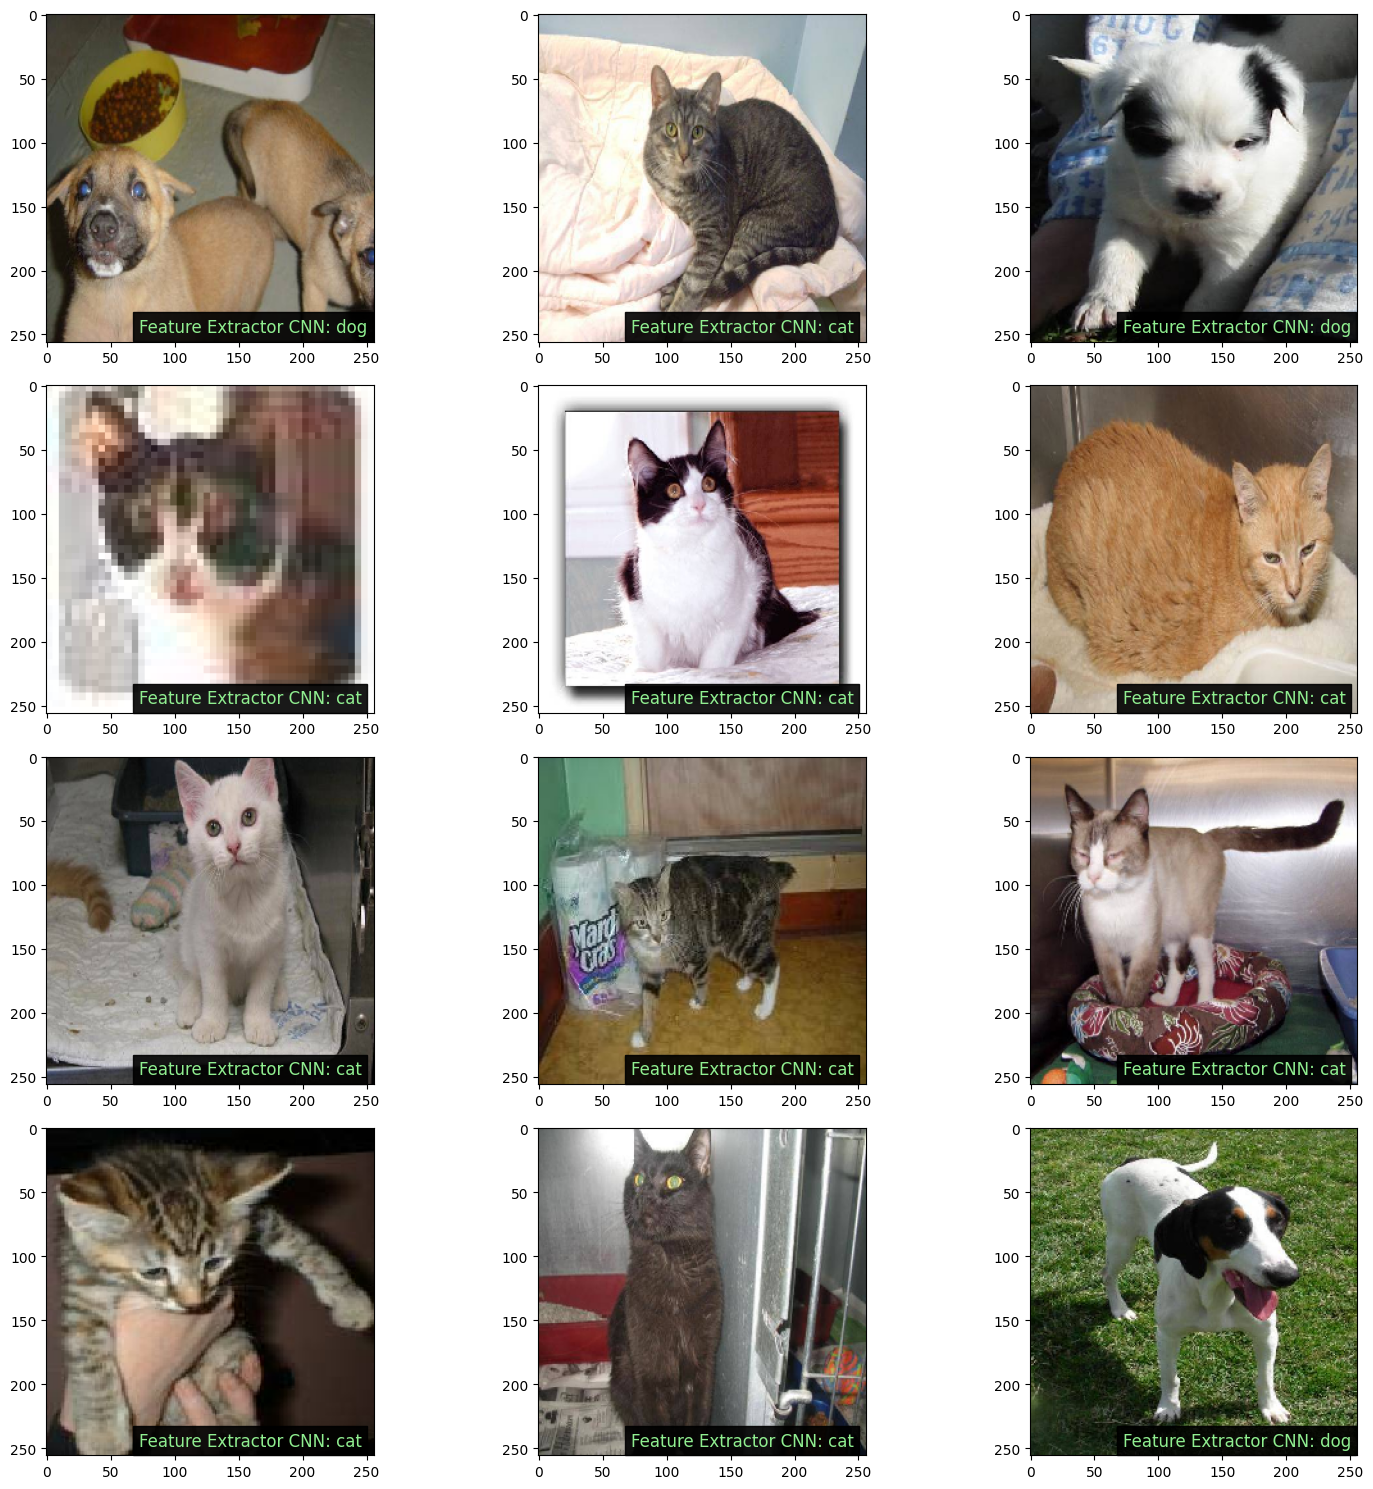

In [ ]:
plt.figure(figsize=(15,15))

for i in range(0, 12):
  plt.subplot(4, 3, i+1)
  result = pred_results[i]
  img = test_sample[i]
  image = load_img(img, target_size=(256,256))
  plt.text(72, 248, f'Feature Extractor CNN: {result}', color='lightgreen', fontsize=12, bbox=dict(facecolor='black', alpha=0.9))
  plt.imshow(image)

plt.tight_layout()
plt.show()